## Estimate Global Impacts from Tropical Cyclones
### Workflow Developed in the Weather4UN Pilot Project at Meteoswiss

### 1. Imports and User Configuration

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

from w4un_hydromet_impact.hazard.main import calculate_hazard
from w4un_hydromet_impact.hazard.constants import KnownHazardSources
from w4un_hydromet_impact.exchange.events import CalculateImpactProperties
from w4un_hydromet_impact.impact.main import calculate_impact

Choose directory to store data and results

In [3]:
from pathlib import Path
from climada import CONFIG
	
DEFAULT_DATA_DIR = CONFIG.local_data.save_dir.dir()

DATA_DIR = Path('./data/')
SAVE_DIR_HAZ = DEFAULT_DATA_DIR / "hazard"
SAVE_DIR_IMP = DEFAULT_DATA_DIR / "impacts"
SAVE_DIR_HAZ.mkdir(parents=True, exist_ok=True)
SAVE_DIR_IMP.mkdir(parents=True, exist_ok=True)

Download centroids from CLIMADA Data API

In [4]:
from climada.util.api_client import Client
climada_client = Client()

centroids = climada_client.get_centroids(
                                    res_arcsec_land=150,
                                    res_arcsec_ocean=1800,
    )
centroids_filename = DATA_DIR / 'earth_centroids_150asland_1800asoceans_distcoast_region_nopoles.hdf5'
centroids.write_hdf5(str(centroids_filename))

### 2. Create a Hazard Based on ECMWF Tropical Cyclone Tracks

We download [ECMWF's Ensemble Forecast Medium-Range](https://www.ecmwf.int/en/forecasts), consisting of 51 ensemble members, to extract track information from active storms.
From the ECMWF input data, a list of TCForecast objects is created, with each object corresponding to a named storm. If the list is empty, it indicates that there are no named storms at the moment, and the use case is complete. The maximum wind speed is multiplied by 1/0.88 to align with the conventions of this computation pipeline.

For each element in the list, a TropCyclone hazard object is generated using a centroids input file. The distance to the coast is ignored, as the input centroids have already been corrected. The Holland 1980 model is applied to generate windfields from the tracks, with a time resolution of 30 minutes. Each forecast ensemble member has a frequency of 1/51. The lead times include two components: the countries affected by the hazard and the approximate time the country will be impacted.

Hazard metadata (e.g., event name, initialization time, lead times per country) is saved as dictionary in a .json file.

Provide an empty string to fetch a current forecast. Or provide a filepath to a grib file as string, to use a saved forecast as an example.

In [5]:
weather_data_location = DATA_DIR / 'S1T02020000mars20220001'

haz_Source = KnownHazardSources.TROPICAL_CYCLONE_FROM_ECMWF

# use the provided weather data from the tropical cyclone "Batsirai"
haz_list = calculate_hazard(weather_data_location, centroids_filename, haz_Source, base_path = str(SAVE_DIR_HAZ))

# use an empty string to fetch the current forecast
#haz_list = calculate_hazard('', centroids_filename, haz_Source, base_path = str(SAVE_DIR_HAZ))

2025-01-27 08:13:18,361 - climada_petals.hazard.tc_tracks_forecast - WARNING - Longitude at time 0: only 1 variable value for 52 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  track = xr.Dataset(
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecon

2025-01-27 08:13:19,574 - climada_petals.hazard.tc_tracks_forecast - WARNING - Longitude at time 0: only 1 variable value for 52 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  track = xr.Dataset(
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecon

2025-01-27 08:13:22,234 - climada_petals.hazard.tc_tracks_forecast - WARNING - Latitude at time 34: only 1 variable value for 2 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.
2025-01-27 08:13:22,235 - climada_petals.hazard.tc_tracks_forecast - WARNING - Pressure at time 36: only 1 variable value for 2 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.
2025-01-27 08:13:22,236 - climada_petals.hazard.tc_tracks_forecast - WARNING - Maximum 10m wind at time 36: only 1 variable value for 2 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.
2025-01-27 08:13:22,237 - climada_petals.hazard.tc_tracks_forecast - WARNING - Pressure at time 37: only 1 variable value for 2 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  track = xr.Dataset(
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecon

We can plot the hazard and print the hazard metadata

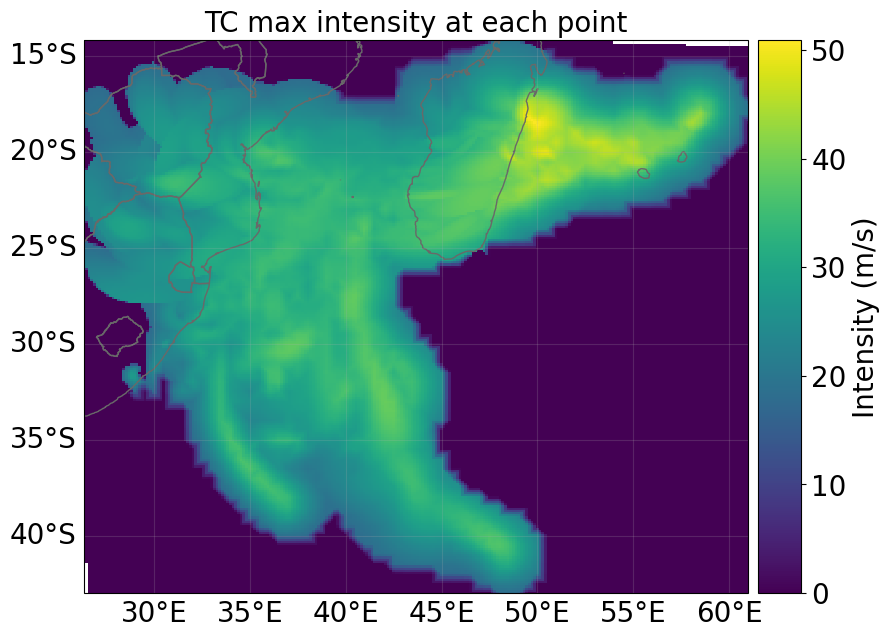

In [6]:
from climada.hazard import Hazard
from w4un_hydromet_impact.hazard.metadata import HazardMetadata
from w4un_hydromet_impact.hazard.plots import _create_hazard_plot

haz = Hazard.from_hdf5(haz_list[0][0])
with open(haz_list[0][1], 'rb') as file:
    hazard_metadata = HazardMetadata.read_from_json(file)
fig = _create_hazard_plot(haz,hazard_metadata)
plt.show()

In [7]:
import json
with open(haz_list[0][1], 'r') as file:
    hazard_metadata_json = json.load(file)
hazard_metadata_pretty = json.dumps(hazard_metadata_json, indent=4)
print(hazard_metadata_pretty)

{
    "event_name": "BATSIRAI",
    "initialisation_time": "2022-02-02T00:00:00.000000000",
    "leadtimes_per_country": {
        "450": {
            "country_name": "Madagascar",
            "country_alpha3": "MDG",
            "country_alpha2": "MG",
            "median_leadtime": "2022-02-05T05:00:00.000000000",
            "all_leadtimes": [
                "2022-02-05T03:00:00.000000000",
                "2022-02-05T04:00:00.000000000",
                "2022-02-04T23:30:00.000000000",
                "2022-02-05T03:00:00.000000000",
                "2022-02-05T06:30:00.000000000",
                "2022-02-05T01:30:00.000000000",
                "2022-02-05T10:00:00.000000000",
                "2022-02-05T11:30:00.000000000",
                "2022-02-05T04:00:00.000000000",
                "2022-02-05T08:00:00.000000000",
                "2022-02-05T10:00:00.000000000",
                "2022-02-04T20:30:00.000000000",
                "2022-02-05T10:00:00.000000000",
             

### 3. Calculate Exposed Population

The impact calculation follows the [IPCC risk concept](https://www.ipcc.ch/site/assets/uploads/2018/02/WGIIAR5-FrontMatterA_FINAL.pdf), which describes natural risk as the interplay between climate and weather-related hazards, exposed populations, assets or ecosystems, and their vulnerability to these hazards. The methodology employed is detailed in [Aznar-Siguan and Bresch (2019)](https://doi.org/10.5194/gmd-12-3085-2019) and the [CLIMADA documentation](https://climada-python.readthedocs.io/en/stable/).

To assess the impact of forecasted storms on individuals living in the affected areas, we overlay the wind field (hazard) with exposure data. If a populated area experiences wind speeds of 18 m/s or higher, all individuals residing there are considered 'exposed to 18mps'.

We can now calculate the exposed population for different wind speeds for each of the potentially impacted countries.


2025-01-27 08:53:04,596 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.
2025-01-27 08:53:10,770 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.
2025-01-27 08:53:17,078 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.
2025-01-27 08:53:23,137 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.
2025-01-27 08:53:28,512 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


2025-01-27 08:53:40,673 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.
2025-01-27 08:53:45,942 - climada.engine.impact_calc - WARNING - No exposures with value >0 in the vicinity of the hazard.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


2025-01-27 08:53:51,613 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.
2025-01-27 08:54:00,567 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.
2025-01-27 08:54:14,128 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.
2025-01-27 08:54:20,090 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some dr

2025-01-27 08:55:00,447 - climada.engine.impact_calc - WARNING - No exposures with value >0 in the vicinity of the hazard.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some dr

2025-01-27 08:56:08,341 - climada.engine.impact_calc - WARNING - No exposures with value >0 in the vicinity of the hazard.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some dr

2025-01-27 08:57:14,199 - climada.engine.impact_calc - WARNING - No exposures with value >0 in the vicinity of the hazard.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some dr

2025-01-27 08:58:21,911 - climada.engine.impact_calc - WARNING - No exposures with value >0 in the vicinity of the hazard.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some dr

2025-01-27 08:59:33,219 - climada.engine.impact_calc - WARNING - No exposures with value >0 in the vicinity of the hazard.


/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/thomasroosli/miniforge3/envs/W4UN/lib/python3.11/site-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some dr

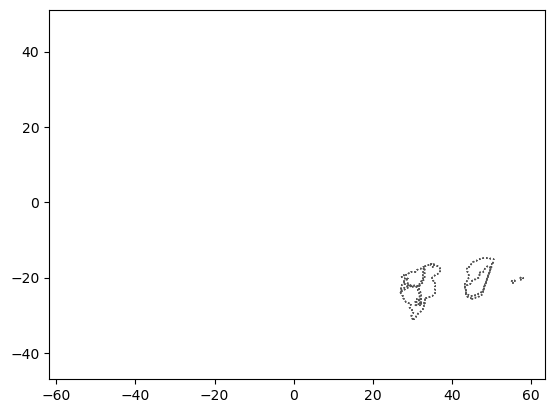

In [9]:
impact_types = ["exposed_population_18mps",
                "exposed_population_33mps",
                "exposed_population_43mps",
                "exposed_population_49mps",
                "exposed_population_58mps",
                "exposed_population_70mps"]
vulnerability_file_names = ["tc_exposed_18mps.xlsx",
                            "tc_exposed_33mps.xlsx",
                            "tc_exposed_43mps.xlsx",
                            "tc_exposed_49mps.xlsx",
                            "tc_exposed_58mps.xlsx",
                            "tc_exposed_70mps.xlsx"]
result = []
# loop for events in forecast
for event_i in haz_list:
    # loop for impact_types
    for impact_type, vulnerability_file_name in zip(impact_types, vulnerability_file_names):
        # loop for affected countries
        for leadtime_i in hazard_metadata_json['leadtimes_per_country'].values():
            calc_impact_properties = CalculateImpactProperties.create(
                country= leadtime_i['country_name'],
                vulnerability_file_name= str(DATA_DIR / vulnerability_file_name),
                impact_type= impact_type,
            )
            res = calculate_impact(
                file_location_hazard = event_i[0],
                file_location_metadata = event_i[1],
                hazard_source = haz_Source,
                calculate_impact_properties = calc_impact_properties,
                base_path = str(SAVE_DIR_IMP))
            result.append(res)
plt.show()

### 4. Look at Results

In the Weather4UN pilot project at MeteoSwiss, several products have been developed to showcase the results of impact calculations. For each forecast, each impacted country and each wind speed four files are produced: 
| File               | Content                                                                   |
| :------------------| :-------------------------------------------------------------------------|
|data.csv            |all data related to the impact forecast stored as csv                      |
|matrix.npz          |all data related to the impact forecast stored as NumPy arrays             |
|polygon.geojson     |contains a polygon for the area where the impact is forecasted to occur    |
|summary.json        |containing the numbers of the impact forecast                              |

We look at the results for the affected countries.

In [10]:
# we choose to look at exposed population to wind speeds of 18 m/s in the first country.
one_result = result[0]


In [11]:
# Check one_result
one_result

[('/home/thomasroosli/gitlab/Weather4UN_global_impact_estimates/jupyter/results/impacts/TC_ECMWF_run2022020200_event20220205_Madagascar_exposed_population_18mps_data.csv',
  '/home/thomasroosli/gitlab/Weather4UN_global_impact_estimates/jupyter/results/impacts/TC_ECMWF_run2022020200_event20220205_Madagascar_exposed_population_18mps_matrix.npz',
  '/home/thomasroosli/gitlab/Weather4UN_global_impact_estimates/jupyter/results/impacts/TC_ECMWF_run2022020200_event20220205_Madagascar_exposed_population_18mps_summary.json',
  '/home/thomasroosli/gitlab/Weather4UN_global_impact_estimates/jupyter/results/impacts/TC_ECMWF_run2022020200_event20220205_Madagascar_exposed_population_18mps_polygon.geojson')]

Here we see the summary in .json format,

In [12]:
import json
with open(one_result[0][2], 'r') as file:
    summary_json = json.load(file)
summary_pretty = json.dumps(summary_json, indent=4)
print(summary_pretty)



{
    "countryName": "Madagascar",
    "hazardType": "TC",
    "impactType": "exposed_population_18mps",
    "initializationTime": "2022020200",
    "eventDate": "2022020500",
    "eventName": "BATSIRAI",
    "leadTime": 3.0,
    "mean": 16000000,
    "min": 11000000,
    "max": 19000000,
    "median": 17000000,
    "05perc": 11000000,
    "25perc": 16000000,
    "75perc": 18000000,
    "95perc": 18000000,
    "productStatus": "alpha",
    "weatherModel": "ECMWF",
    "impactUnit": "people"
}


and the polygon of the affected area in .geojson format.

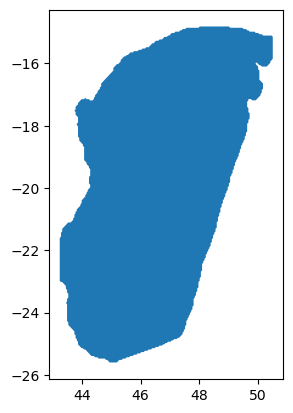

In [13]:
import geopandas as gpd

polygons  = gpd.read_file(one_result[0][3])
if polygons.empty:
    print('there was no affected area detected')
else:
    ax = polygons.plot()
    plt.show()

In [14]:
# check polygons
polygons

,geometry
0,"POLYGON ((44.93750 -25.60208, 44.97917 -25.602..."
